## Gene Enrichment analysis

In [52]:
!pip install gseapy

In [53]:
%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import gseapy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
names = gseapy.get_library_name()
print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [61]:
import pandas as pd

df = pd.read_csv('blast_canonical-count-tables/1-2mismatches_peptides_match_info/genes_merged_pep_vars.tsv', sep="\t")
gene_list_more2 = df['gene'].to_list()
for gene in gene_list_more2:
    print(gene)

COL6A1
IGHG2
SLC38A10
HDGF
SERPINA1
AKAP12
CHGB
COL6A2
CORO7
MGAM
PLEC
IGHG3
ITPKB
CBR4
THRAP3
LMO7
PSMD13
MYH11
CAND2
PGM1
FGL1
GOLGA3
NOP56
PDCD4
SORBS3
CAVIN2
RRBP1
PCMT1
SLC30A9
GAA
GSPT1
EML4
CYBRD1
IGKV1D-39
APIP
CD99
IQGAP2
SYTL4
AHNAK
ESD
SLC44A2
H1-6
ENO3
DNAJC10
GFAP
IGHV3-74
GPLD1
DMD
CTSC
ATP6V1E2
ARHGEF18
C8A
KRT7
FABP1
PALM
SUMF2
MYH9
PPL
MYOM3
ACAT2
CHD4
GTF3C3
SLK
IGKV1-8
IGKV2D-29
GSTO1
CLU
RPL13
ADD1
TG
GLRX5
TRDN
TNKS1BP1
CFH
HCLS1
TNXB
HSPB6
ETFB
SYNPO2
TPSAB1
AHNAK2
FLG
SUCLA2
TNC
PDLIM5
PRKCSH
ACTN2
KLK1
LAMA2
TBCK
ADH1C
MYOF
HSP90B1
C7
GSN
ZSCAN18
DCAF8
RTN3
TBC1D9B
WNK1
SIGLEC1
HSPG2
A2M
SYNM
FLNB
FEZ2
TRAPPC10
SEPTIN11
PPP1R2B
TMEM132A
SPEN
DMAC1
ACAD9
MUC2
UGT2A2
SYNE2
POLR1A
ITGAV
INF2
HPS4
PDCD6IP
ZXDC
CHGA
IST1
MCCC1
PRUNE2
NUCB2
SARDH
KLHL15
WDR4
ANKLE2
PFAS
NDUFV3
RIPK2
SERPINF1
SEC23IP
MIA3
ZNF579
SON
TAP1
ATXN1
NIBAN1
PTPRN2
LAMA5
MROH1
HLA-B
CLGN
FCGBP
FLVCR1
PNPLA6
PRL
CYP2C9
GSTM1
EPB41L3
PARP10
HAL
AKAP9
LRRFIP1
OBSL1
MUC5AC
DMRT2
PNP
ANPEP
FLG2
PNP

In [62]:
import pandas as pd
from scipy import stats

# Load your data into a pandas DataFrame
# Assuming df has columns: 'Gene', 'NumberOfPeptides'

df.head()
column_study = 'num_vars' 

# Calculate the overall mean and standard deviation of the number of peptides
overall_mean = df[column_study].mean()
overall_std = df[column_study].std()

# Initialize a dictionary to store the results
results = {}
total = {}

# Perform hypothesis testing for each gene
for _, row in df.iterrows():
    gene = row['gene']
    num_peptides = row[column_study]
    
    # Perform a one-sample t-test comparing the gene's number of peptides to the overall mean
    # Since we're comparing a single gene's count to the population mean, use a z-score:
    z_score = (num_peptides - overall_mean) / overall_std
    p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test for the z-score
    
    # If the p-value is less than 0.01, the gene's expression is considered significantly different
    if p_value < 0.05:
       results[gene] = {column_study: num_peptides, 'PValue': p_value}
       
    total[gene] = p_value

# Output the list of genes that are significantly different under the p-value threshold
print("Genes significantly different under p-value threshold of 0.05:")
for gene, stats in results.items():
    print(f"Gene: {gene}, Number of {column_study}: {stats[column_study]}, P-Value: {stats['PValue']:.5f}")

over_express_list = [] 
for gene, stats in results.items(): 
    print(gene)
    over_express_list.append(gene)

for gene, p_value in total.items():
    print(p_value)

Genes significantly different under p-value threshold of 0.05:
Gene: AKAP12, Number of num_vars: 8, P-Value: 0.00006
Gene: CHGB, Number of num_vars: 8, P-Value: 0.00006
Gene: PLEC, Number of num_vars: 8, P-Value: 0.00006
Gene: IGHG3, Number of num_vars: 10, P-Value: 0.00000
Gene: LMO7, Number of num_vars: 6, P-Value: 0.00576
Gene: RRBP1, Number of num_vars: 10, P-Value: 0.00000
Gene: CD99, Number of num_vars: 6, P-Value: 0.00576
Gene: IQGAP2, Number of num_vars: 5, P-Value: 0.03264
Gene: AHNAK, Number of num_vars: 13, P-Value: 0.00000
Gene: DMD, Number of num_vars: 8, P-Value: 0.00006
Gene: PPL, Number of num_vars: 5, P-Value: 0.03264
Gene: MYOM3, Number of num_vars: 6, P-Value: 0.00576
Gene: GSTO1, Number of num_vars: 5, P-Value: 0.03264
Gene: TG, Number of num_vars: 12, P-Value: 0.00000
Gene: TNKS1BP1, Number of num_vars: 5, P-Value: 0.03264
Gene: TNXB, Number of num_vars: 6, P-Value: 0.00576
Gene: SYNPO2, Number of num_vars: 5, P-Value: 0.03264
Gene: TPSAB1, Number of num_vars: 6, P

0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7925227848430749
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7925227848430749
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590278868
0.7177677590

In [65]:
gene_list_more2_function = gp.enrichr(gene_list=over_express_list,
 gene_sets=['GO_Molecular_Function_2023', 'GO_Biological_Process_2023', 'GO_Cellular_Component_2021', "Reactome_2022"],
 organism='Human', 
#  background= gene_list_more2,                                      
 outdir='enrish_analysis',
 cutoff=0.5 
 )
gene_list_more2_function.results.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,Actin Binding (GO:0003779),7/183,0.000004,0.000268,0,0,12.470960,156.566709,SMTN;SYNPO2;NRAP;DMD;IQGAP2;SYNE2;SYNE1
1,GO_Molecular_Function_2023,Muscle Alpha-Actinin Binding (GO:0051371),3/14,0.000015,0.000552,0,0,81.081411,903.147012,SYNPO2;NRAP;TTN
2,GO_Molecular_Function_2023,Alpha-Actinin Binding (GO:0051393),3/23,0.000069,0.001752,0,0,44.574627,426.989597,SYNPO2;NRAP;TTN
3,GO_Molecular_Function_2023,Vinculin Binding (GO:0017166),2/10,0.000534,0.010139,0,0,73.242647,551.944023,SYNM;DMD
4,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),6/319,0.000874,0.013286,0,0,5.875699,41.378522,LAD1;AHNAK;TNKS1BP1;LRRFIP1;PPL;PLEC
5,GO_Molecular_Function_2023,Ankyrin Binding (GO:0030506),2/18,0.001782,0.022569,0,0,36.606618,231.725354,OBSCN;PLEC
6,GO_Molecular_Function_2023,Actinin Binding (GO:0042805),2/20,0.002203,0.023915,0,0,32.535948,199.057604,SYNPO2;TTN
7,GO_Molecular_Function_2023,MHC Class II Protein Complex Binding (GO:0023026),2/25,0.003439,0.032669,0,0,25.456522,144.404980,HLA-DRB5;HLA-DRB1
8,GO_Molecular_Function_2023,"Phosphatidylinositol-3,4,5-Trisphosphate Bindi...",2/36,0.007045,0.059490,0,0,17.211073,85.288808,OBSCN;IQGAP2
9,GO_Molecular_Function_2023,Axon Guidance Receptor Activity (GO:0008046),1/5,0.017380,0.105123,0,0,72.195652,292.570220,HMCN2


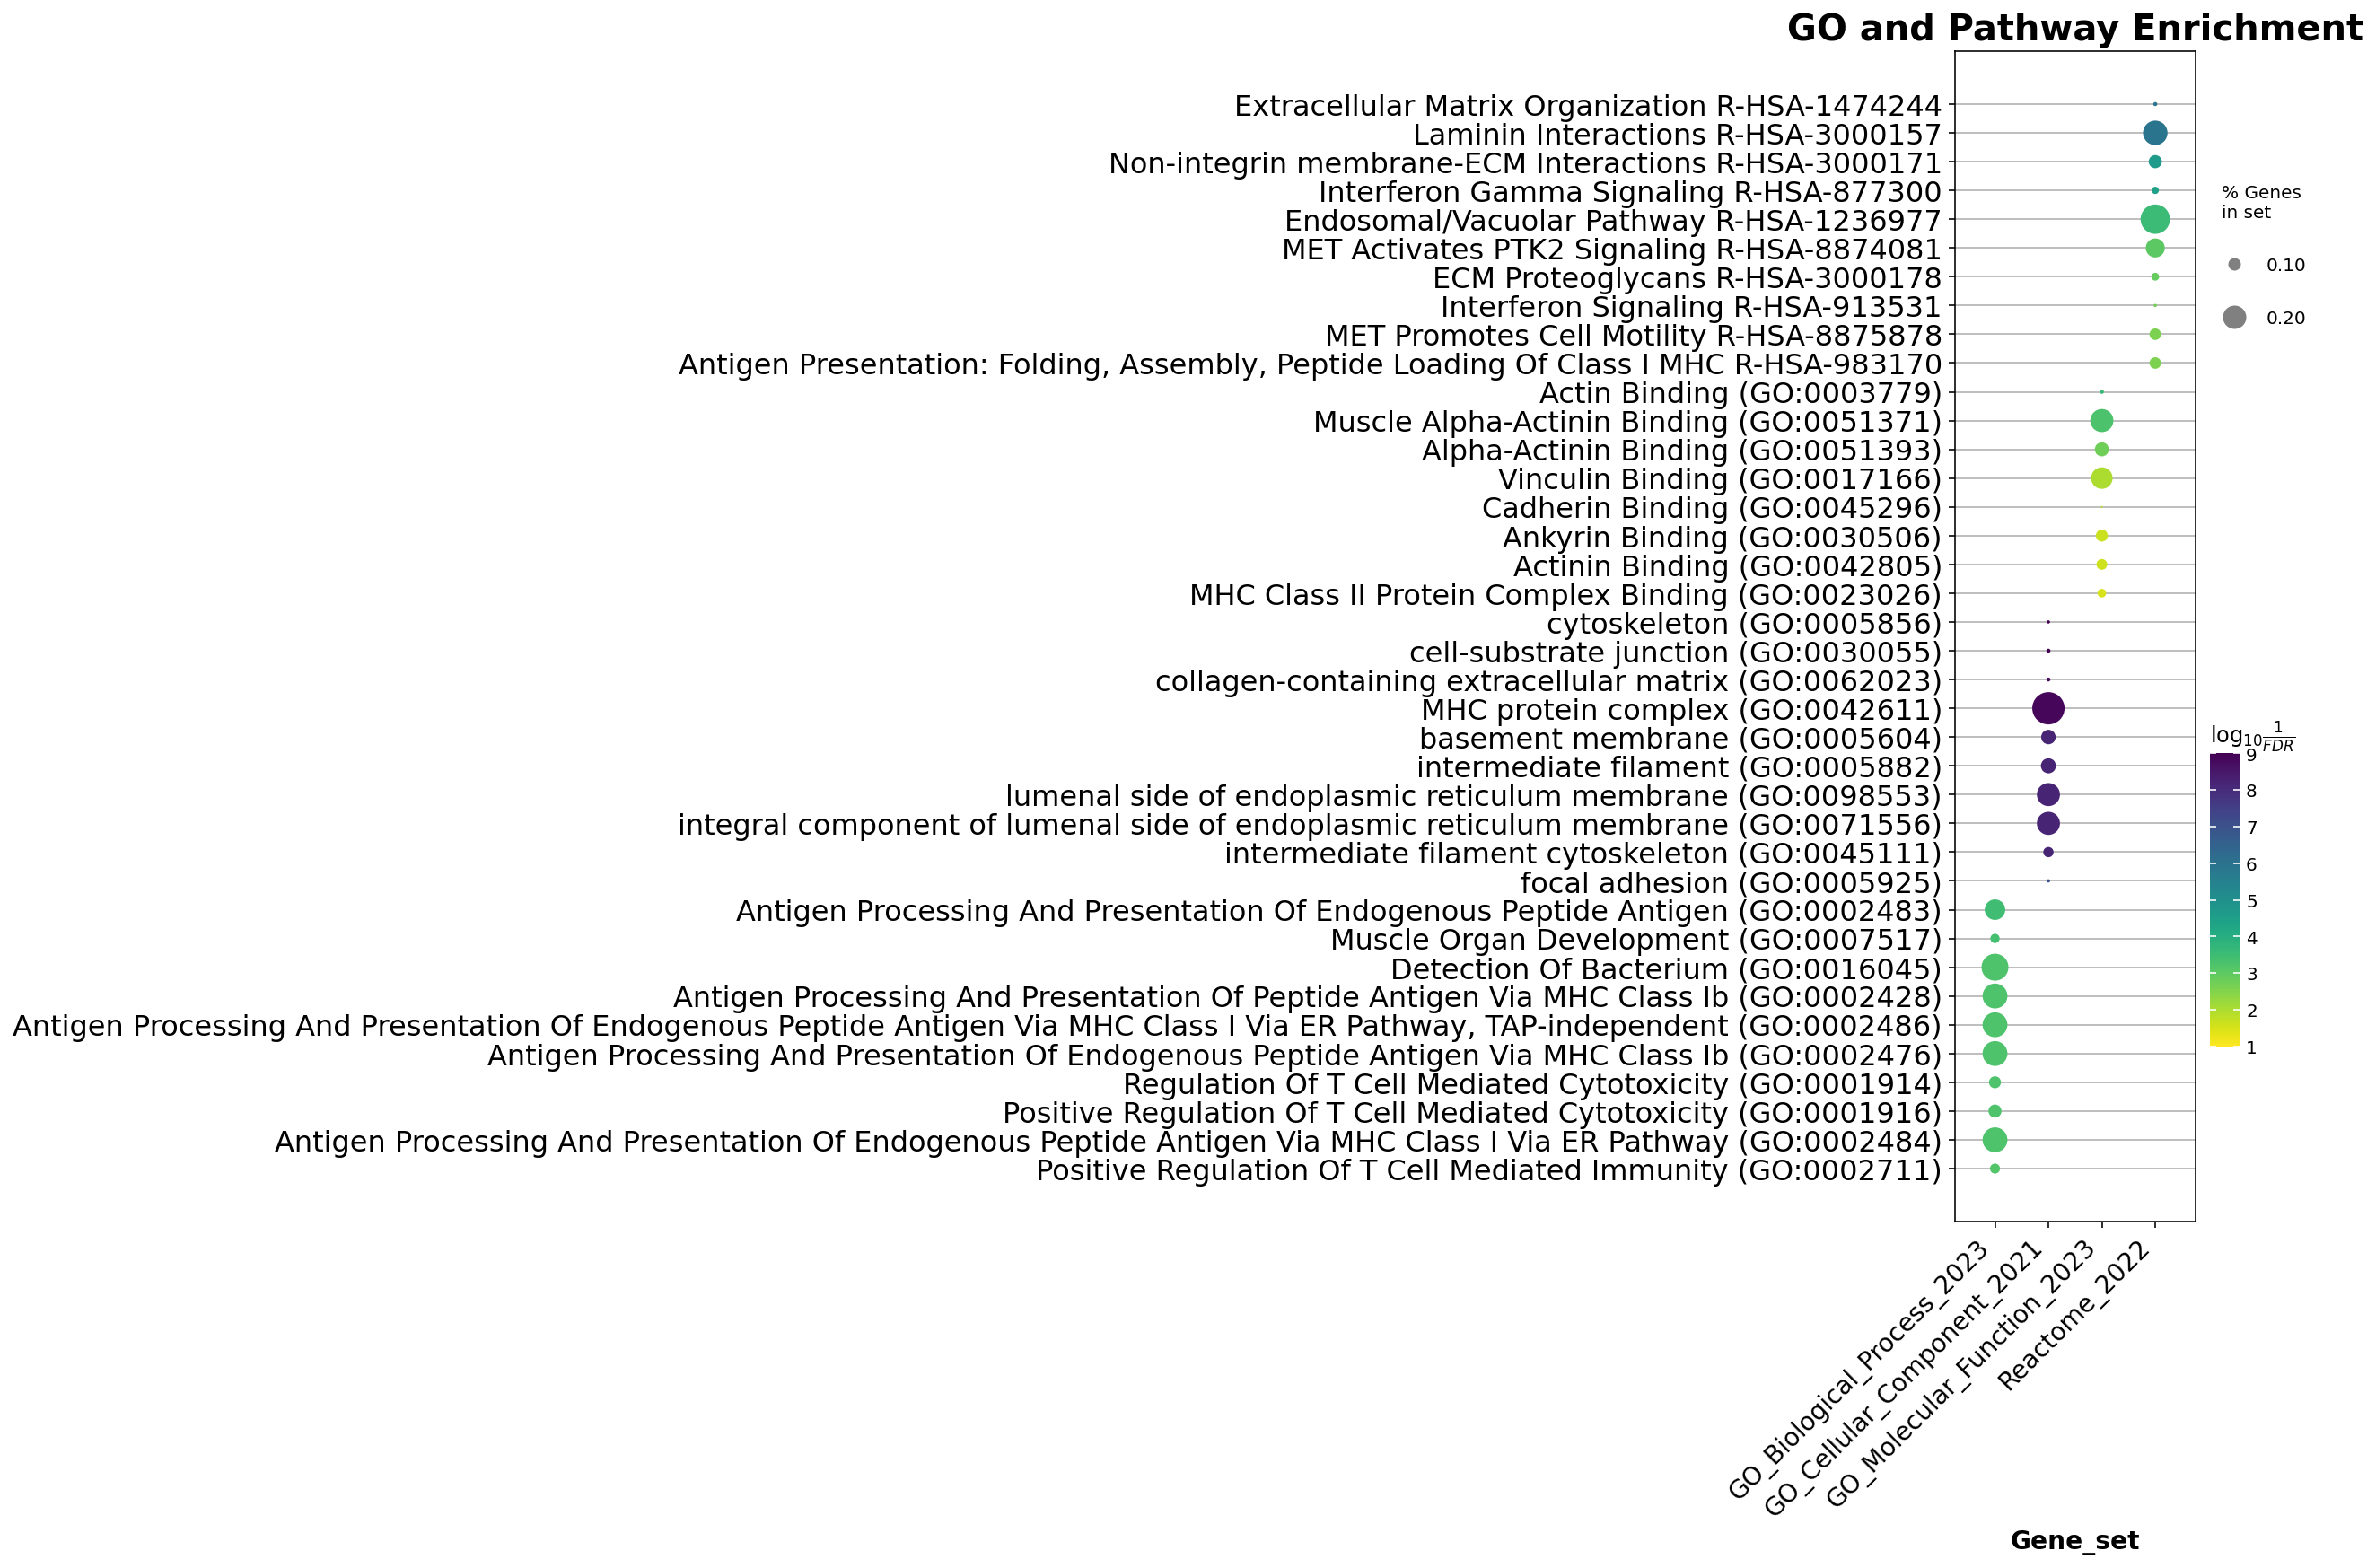

In [69]:
from gseapy.plot import barplot, dotplot
ax = dotplot(gene_list_more2_function.results,title='GO and Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("GO Enrichment.svg")

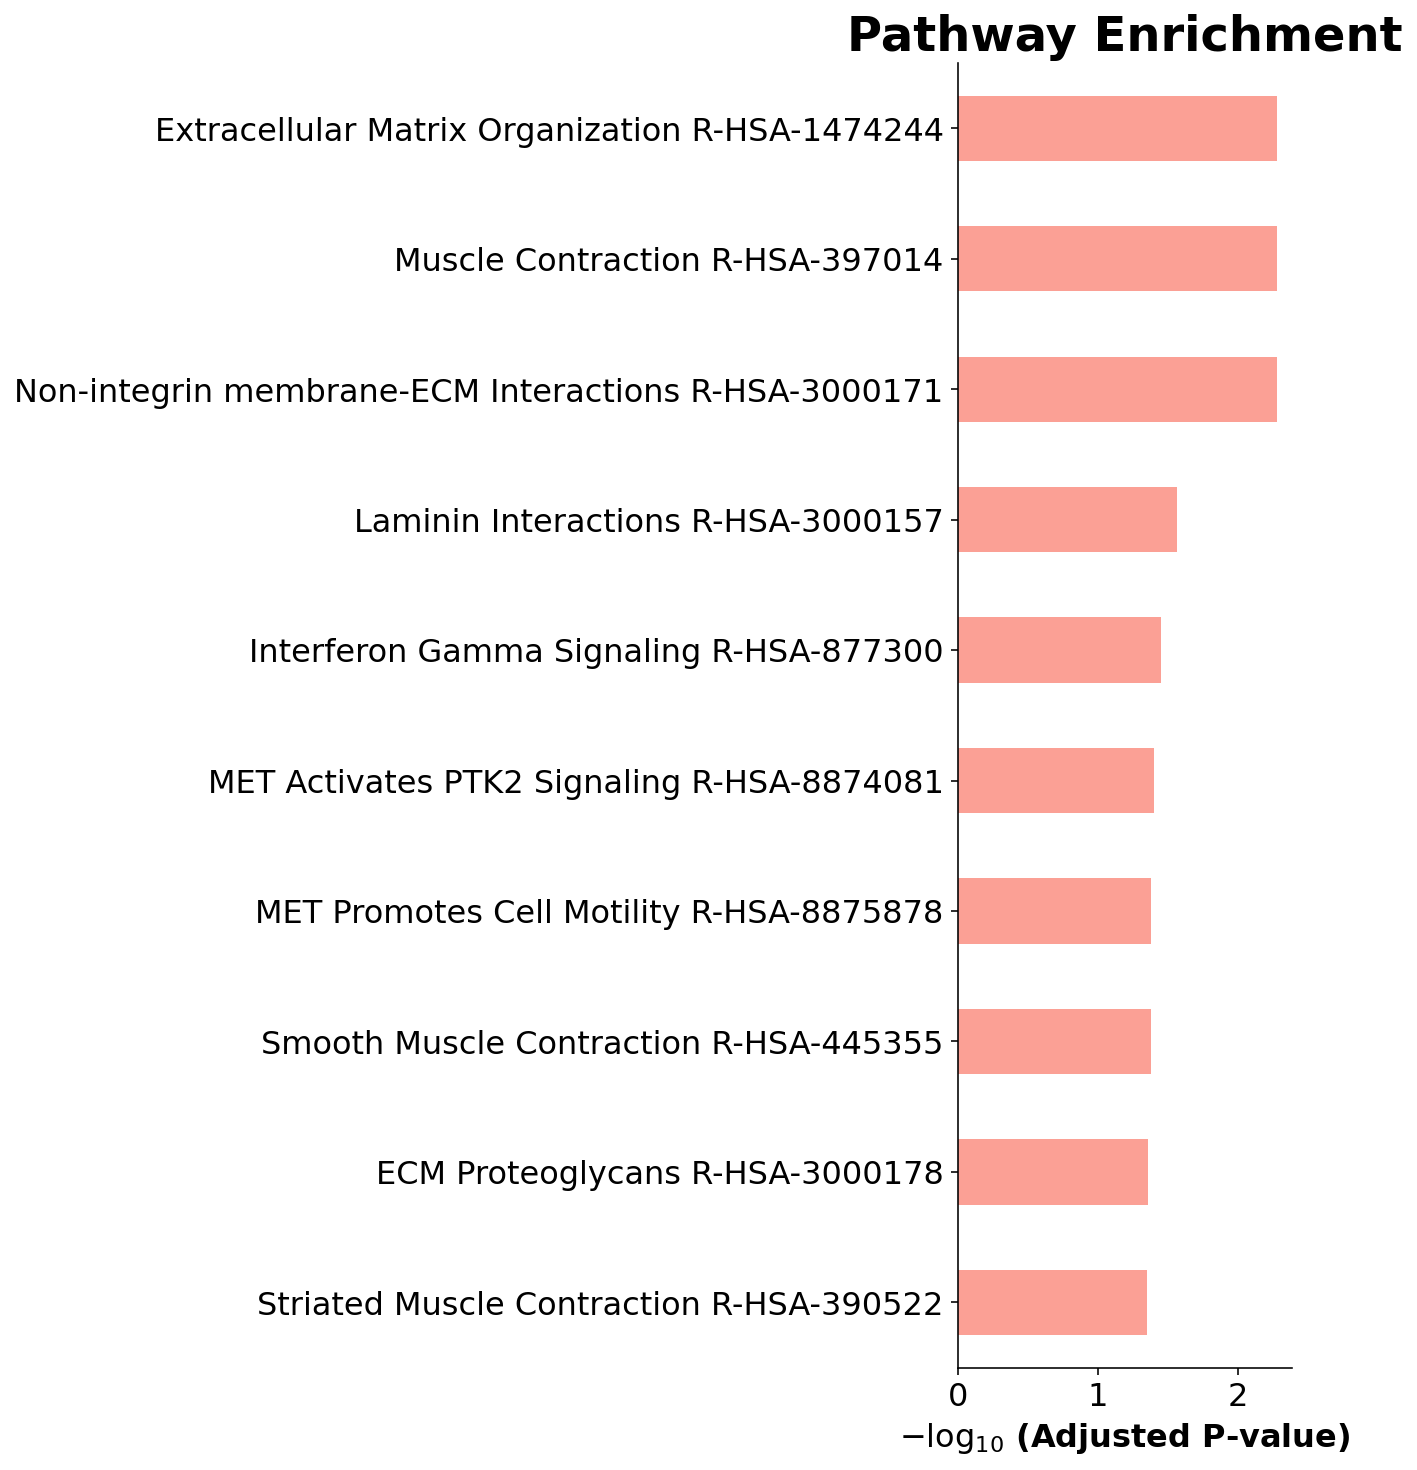

In [39]:
gene_list_more2_pathway = gp.enrichr(gene_list=over_express_list,
 gene_sets=['Reactome_2022'],
 organism='Human',  
 background=gene_list_more2,                                   
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = barplot(gene_list_more2_pathway.results,title='Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("Pathway_Enrich.svg")

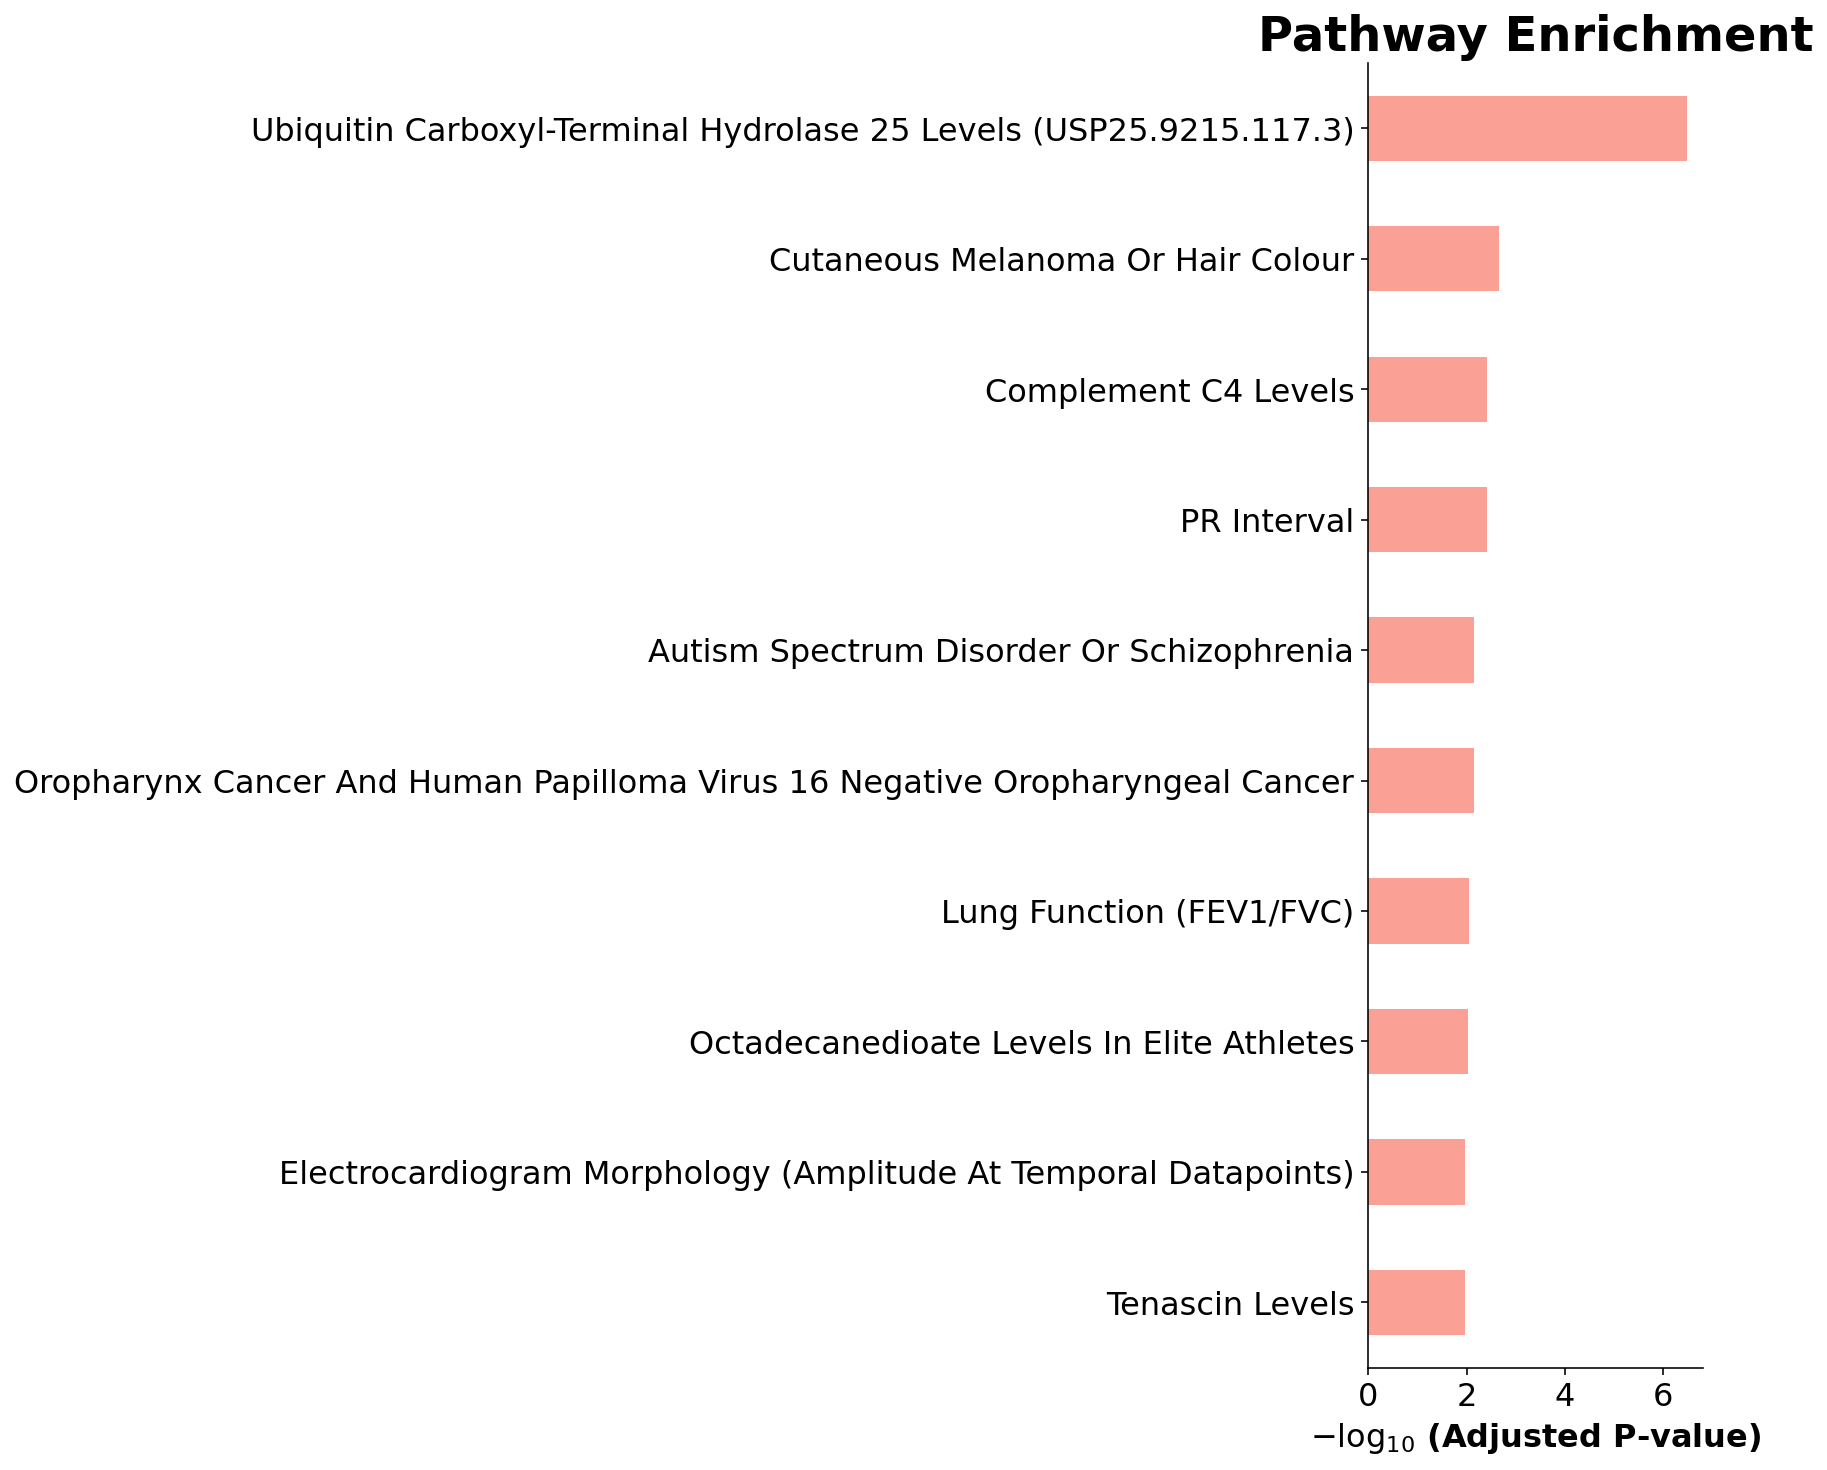

In [40]:
gene_list_more2_pathway = gp.enrichr(gene_list=over_express_list,
 gene_sets=['GWAS_Catalog_2023'],
 organism='Human',  
#background=gene_list_more2,                                   
 outdir='enrish_analysis',
 cutoff=0.5 
 )
ax = barplot(gene_list_more2_pathway.results,title='Pathway Enrichment', 
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
              figsize=(3,12),
            )
ax.figure.savefig("Pathway_Enrich.svg")